In [ ]:
import sklearn.datasets
digit=sklearn.datasets.load_digits()

In [ ]:
print(digit.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
digit.data.shape

(1797, 64)

In [ ]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
digit_image = digit.images[0]  # first image
print(digit_image)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 640x480 with 0 Axes>

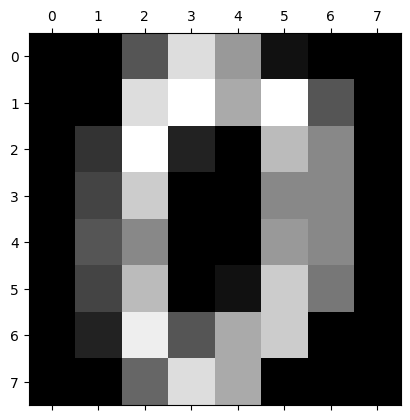

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digit.data[0].reshape(8,8))

<Figure size 640x480 with 0 Axes>

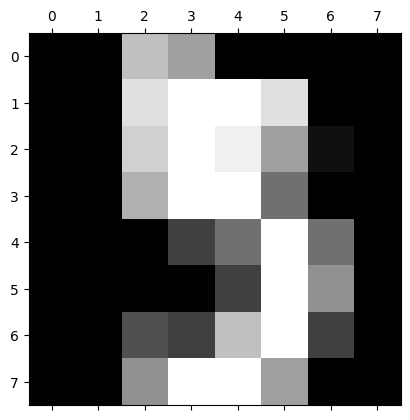

In [ ]:
plt.gray()
plt.matshow(digit.data[5].reshape(8,8))

In [ ]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digit.target.shape[0]

1797

In [ ]:
import numpy as np
np.unique(digit.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
import pandas as pd
df=pd.DataFrame(data=digit.data,columns=digit.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=digit.data
scaler.fit(X)
X_scaled= scaler.transform(X)

In [ ]:
X_scaled

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [ ]:
X.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95).fit_transform(X_scaled)
pca.shape

(1797, 30)

In [ ]:
from sklearn.model_selection import train_test_split
y=digit.target
X_train,X_test,y_train,y_test=train_test_split(pca,y,test_size=0.2,random_state=30)

In [ ]:
from sklearn import svm
model = svm.SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

Comparer kernel linéaire, RBF, poly

*   Accuracy score
*   Scalabilité (temps d'entrainement)



In [ ]:
from sklearn.metrics import accuracy_score
#kernel linéaire
svm_linear = svm.SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Accuracy (linéaire) :", accuracy_score(y_test, y_pred_linear))

#kernel polynomial (degré 3 par défaut)
svm_poly = svm.SVC(kernel="poly", degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print("Accuracy (poly) :", accuracy_score(y_test, y_pred_poly))

#kernel RBF
svm_rbf = svm.SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("Accuracy (RBF) :", accuracy_score(y_test, y_pred_rbf))


Accuracy (linéaire) : 0.9916666666666667
Accuracy (poly) : 0.9972222222222222
Accuracy (RBF) : 0.9972222222222222


In [ ]:
import time
kernels = ["linear", "poly", "rbf"]
for k in kernels:
    clf = svm.SVC(kernel=k)

    start = time.time()
    clf.fit(X, y)  # Entraînement
    end = time.time()

    print("Kernel : ",k)
    print("Temps: \n",end-start)

Kernel :  linear
Temps: 
 0.034525394439697266
Kernel :  poly
Temps: 
 0.03534221649169922
Kernel :  rbf
Temps: 
 0.05293130874633789


Visualiser marge et erreurs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# ⚠️ Suppose que X et y sont déjà définis (ton dataset)
# et que X a exactement 2 colonnes (deux features)

# SVM (tu peux changer kernel = "linear", "rbf", "poly")
clf = SVC(kernel="linear", C=1)
clf.fit(X, y)

# Grille pour la visualisation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Calcul de la distance aux marges
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer la frontière et les marges
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors="k", linestyles=["--", "-", "--"])

# Tracer les points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")

# Tracer les vecteurs de support
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=120, facecolors="none", edgecolors="yellow", linewidths=2, label="Support Vectors")

plt.title("SVM : marges, frontière et vecteurs de support")
plt.legend()
plt.show()
